In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [3]:
credit = pd.read_csv('https://raw.githubusercontent.com/vanindraa/vanindrarepo/master/BankChurners.csv')
credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
credit.shape

(10127, 23)

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
#Dua kolom ini di drop berdasarkan instruksi dari yang mengupload data di Kaggle

credit = credit.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
credit = credit.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
credit.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Let's Prepare The Data To be Visualized

Pada dataset credit card customer, berikan visualisasi dan insight dari berbagai
variabel yang tersedia, dapat dikelompokkan berdasarkan Attrition_Flag,
Customer_Age, Gender, Education_Level, dan Income_Category.

In [8]:
vis = credit[['CLIENTNUM','Card_Category','Attrition_Flag','Customer_Age','Gender','Education_Level','Income_Category']]

In [9]:
vis.head()

,CLIENTNUM,Card_Category,Attrition_Flag,Customer_Age,Gender,Education_Level,Income_Category
0,768805383,Blue,Existing Customer,45,M,High School,$60K - $80K
1,818770008,Blue,Existing Customer,49,F,Graduate,Less than $40K
2,713982108,Blue,Existing Customer,51,M,Graduate,$80K - $120K
3,769911858,Blue,Existing Customer,40,F,High School,Less than $40K
4,709106358,Blue,Existing Customer,40,M,Uneducated,$60K - $80K


In [10]:
vis['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

### ---------------------------------------------------DIVIDER------------------------------------------------

# Attrition Flag

In this data, we have two unique values. Existing and Attrited Customer. Meaning, we can see how many customers we have lost

In [11]:
att = vis['Attrition_Flag'].value_counts().reset_index()
att

,index,Attrition_Flag
0,Existing Customer,8500
1,Attrited Customer,1627


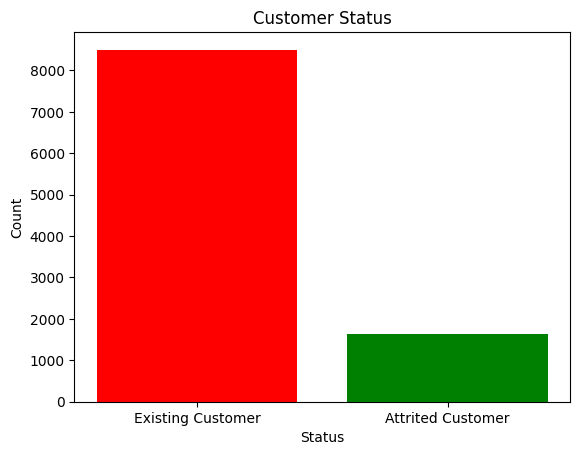

In [12]:
plt.bar(att['index'], att['Attrition_Flag'], color=['Red','Green'])
plt.title('Customer Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

([<matplotlib.patches.Wedge at 0x1c38547ca30>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customer'),
  Text(0.9628371693563555, -0.5319253568930898, 'Attrited Customer')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.9%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.1%')])

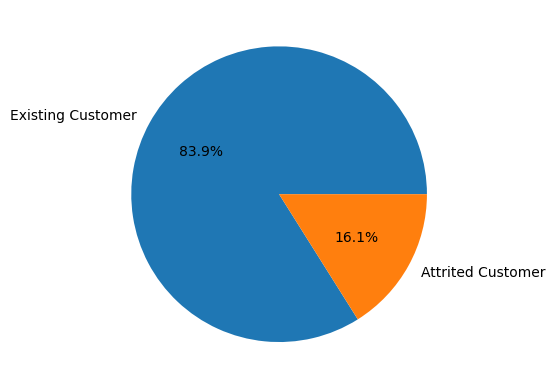

In [13]:
#Pie Chart
plt.pie(x=att['Attrition_Flag'], labels=att['index'], autopct='%1.1f%%')

From visualizations above, we can conclude that we have lost 16,1% customers which made up of 1627 people. Now how much does this being affected by income and which cardholder left.

### ---------------------------------------------------DIVIDER------------------------------------------------

Below, I added income classification and its index to make visualization easier and more practical.

In [14]:
vis['income'] = np.where(vis['Income_Category']=='$120K +', 'High','unknown')
vis['income'] = np.where(vis['Income_Category']=='$80K - $120K', 'Mid Up',vis['income'])
vis['income'] = np.where(vis['Income_Category']=='$60K - $80K', 'Mid',vis['income'])
vis['income'] = np.where(vis['Income_Category']=='$40K - $60K', 'Mid Low',vis['income'])
vis['income'] = np.where(vis['Income_Category']=='Less than $40K', 'Low',vis['income'])

C:\Users\user\AppData\Local\Temp\ipykernel_9924\3595698484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis['income'] = np.where(vis['Income_Category']=='$120K +', 'High','unknown')
C:\Users\user\AppData\Local\Temp\ipykernel_9924\3595698484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis['income'] = np.where(vis['Income_Category']=='$80K - $120K', 'Mid Up',vis['income'])
C:\Users\user\AppData\Local\Temp\ipykernel_9924\3595698484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [15]:
vis['income_index'] = np.where(vis['Income_Category']=='$120K +', 5,0)
vis['income_index'] = np.where(vis['Income_Category']=='$80K - $120K', 4,vis['income_index'])
vis['income_index'] = np.where(vis['Income_Category']=='$60K - $80K', 3,vis['income_index'])
vis['income_index'] = np.where(vis['Income_Category']=='$40K - $60K', 2,vis['income_index'])
vis['income_index'] = np.where(vis['Income_Category']=='Less than $40K', 1,vis['income_index'])

C:\Users\user\AppData\Local\Temp\ipykernel_9924\3139627142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis['income_index'] = np.where(vis['Income_Category']=='$120K +', 5,0)
C:\Users\user\AppData\Local\Temp\ipykernel_9924\3139627142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis['income_index'] = np.where(vis['Income_Category']=='$80K - $120K', 4,vis['income_index'])
C:\Users\user\AppData\Local\Temp\ipykernel_9924\3139627142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [16]:
vis.head()

,CLIENTNUM,Card_Category,Attrition_Flag,Customer_Age,Gender,Education_Level,Income_Category,income,income_index
0,768805383,Blue,Existing Customer,45,M,High School,$60K - $80K,Mid,3
1,818770008,Blue,Existing Customer,49,F,Graduate,Less than $40K,Low,1
2,713982108,Blue,Existing Customer,51,M,Graduate,$80K - $120K,Mid Up,4
3,769911858,Blue,Existing Customer,40,F,High School,Less than $40K,Low,1
4,709106358,Blue,Existing Customer,40,M,Uneducated,$60K - $80K,Mid,3


### ---------------------------------------------------DIVIDER------------------------------------------------

Bagian ini, saya mencari kelompok mana yang paling banyak meninggalkan service.

In [17]:
attrited = vis.loc[vis['Attrition_Flag']=='Attrited Customer']
attrited = attrited.groupby('income')[['Attrition_Flag']].count().sort_values('Attrition_Flag',ascending=True).reset_index()
attrited = attrited.drop(1)
attrited

,income,Attrition_Flag
0,High,126
2,Mid,189
3,Mid Up,242
4,Mid Low,271
5,Low,612


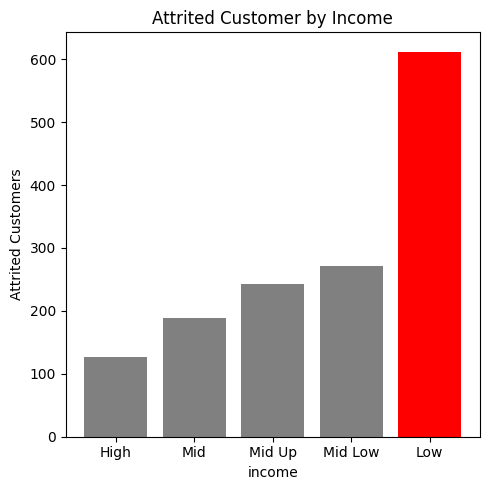

In [59]:
plt.bar(attrited['income'],attrited['Attrition_Flag'],color = ['Grey','Grey','Grey','Grey','Red'])
plt.title('Attrited Customer by Income')
plt.xlabel('income')
plt.ylabel('Attrited Customers')
plt.show()

Melalui diagram batang di atas, customer yang memilih untuk meninggalkan service kebanyakan berasal dari kalangan dengan low income (Less Than $40K). Pertanyaan permasalahan yang muncul adalah bisa jadi service yang ada kurang inclusive atau tidak memberikan benefit bagi mereka yang memiliki pendapatan rendah. 

### ---------------------------------------------------DIVIDER------------------------------------------------

# Customer by Gender

Disini kita melihat distribusi gender diantara customer.

In [18]:
gen = vis.groupby('Gender').count()[['Customer_Age']].reset_index()
gen

,Gender,Customer_Age
0,F,5358
1,M,4769


Melalui dataframe diatas, terlihat jika kebanyakan customer merupakan perempuan.

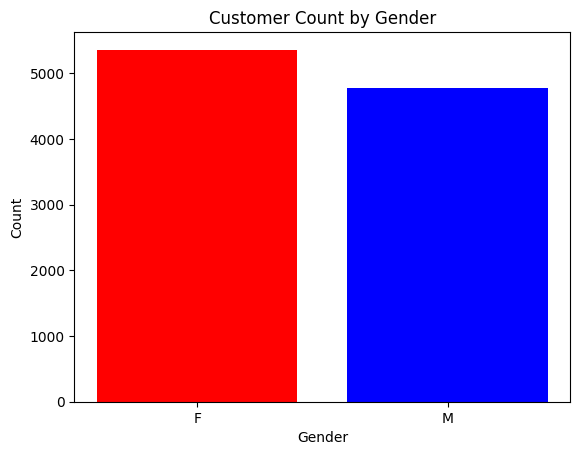

In [19]:
plt.bar(gen['Gender'], gen['Customer_Age'], color=['Red','Blue'])
plt.title('Customer Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

([<matplotlib.patches.Wedge at 0x1c3851156c0>,
 [Text(-0.10035590564411713, 1.0954125671190509, 'F'),
  Text(0.10035590564411676, -1.095412567119051, 'M')],
 [Text(-0.054739584896791156, 0.5974977638831186, '52.9%'),
  Text(0.05473958489679095, -0.5974977638831187, '47.1%')])

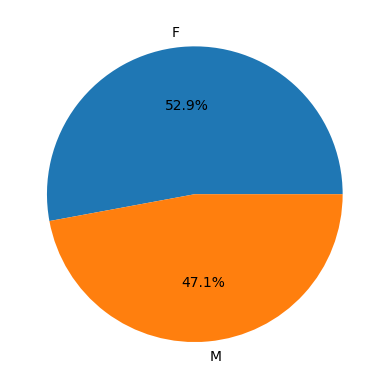

In [20]:
plt.pie(x=gen['Customer_Age'], labels=gen['Gender'], autopct='%1.1f%%')

Dua visualisasi di atas juga mendukung bahwa kebanyakan customer merupakan perempuan dengan komposisi 57.9%.

### ---------------------------------------------------DIVIDER------------------------------------------------

# Customer Age Distribution

Lalu, bagaimana dengan umur para customer? Apakah kebanyakan anak muda? atau jangan-jangan kebanyakan pengguna service kita adalah orang tua? Data ini dapat digunakan untuk membuat perencanaan pengiklanan ataupun untuk ekspansi demografi customer.

In [23]:
#Pemberian kategori untuk masing-masing umur
vis['age_cat'] = np.where(vis['Customer_Age'] <70, 'oldies','elderly')
vis['age_cat'] = np.where(vis['Customer_Age'] <50, 'adult',vis['age_cat'])
vis['age_cat'] = np.where(vis['Customer_Age'] <30, 'young adul',vis['age_cat'])
vis['age_cat'] = np.where(vis['Customer_Age'] <20, 'kids',vis['age_cat'])

C:\Users\user\AppData\Local\Temp\ipykernel_9924\3904395091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis['age_cat'] = np.where(vis['Customer_Age'] <70, 'oldies','elderly')
C:\Users\user\AppData\Local\Temp\ipykernel_9924\3904395091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis['age_cat'] = np.where(vis['Customer_Age'] <50, 'adult',vis['age_cat'])
C:\Users\user\AppData\Local\Temp\ipykernel_9924\3904395091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [65]:
vis.groupby('age_cat')[['Customer_Age']].count()

,Customer_Age
age_cat,
adult,6402
elderly,2
oldies,3528
young adul,195


Melalui dataframe diatas, dapat terlihat bahwa kebanyakan customer merupakan adult yang berusia antara 30-49 tahun.

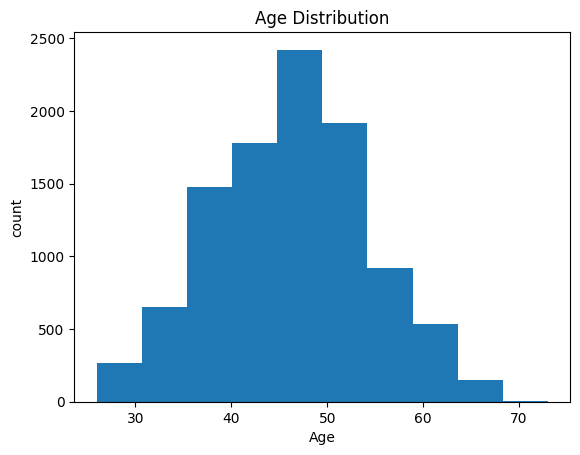

In [25]:
plt.hist(vis['Customer_Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

Untuk persebaran umurnya,terlihat ada spike yang cukup tinggi pada range umur 40-50 tahun. Ini menandakan kebanyakan customer kita berada pada umur 40 keatas. Jika ingin melakukan expansion demografi dan ingin menggait customer dengan usia lebih muda, kita bisa melakukan pengiklanan dengan konsep modern dengan mengacu pada trend-trend di sosial media.

# Customer Age Count

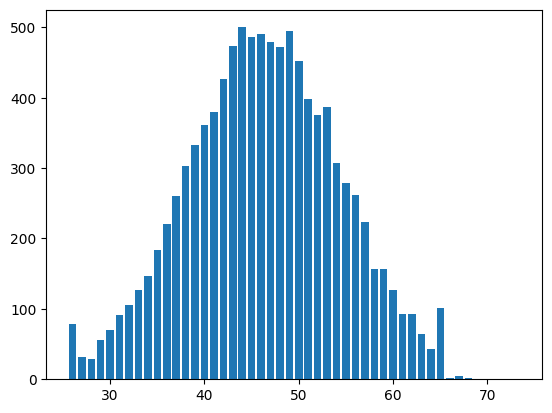

In [26]:
age_count=vis.groupby('Customer_Age')[['CLIENTNUM']].count().reset_index()
plt.bar(age_count['Customer_Age'],age_count['CLIENTNUM'])
plt.show()

### ---------------------------------------------------DIVIDER------------------------------------------------

# Customer Education Level

Di sini kita ingin mengetahui tingkat pendidikan dari para customers

In [75]:
edu = vis.groupby('Education_Level')[['CLIENTNUM']].count().reset_index()
edu = edu.drop(6)
edu

,Education_Level,CLIENTNUM
0,College,1013
1,Doctorate,451
2,Graduate,3128
3,High School,2013
4,Post-Graduate,516
5,Uneducated,1487


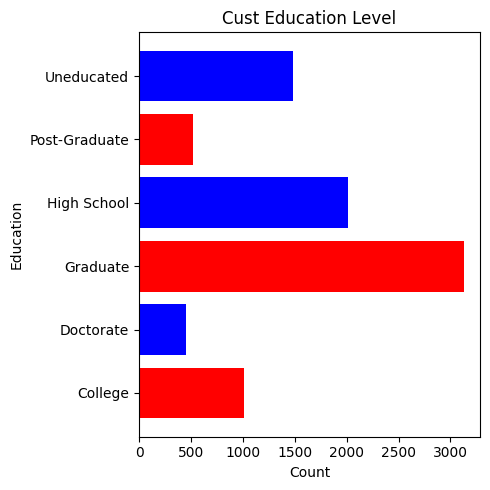

In [133]:
plt.barh(edu['Education_Level'], edu['CLIENTNUM'], color=['Red','Blue'])
plt.title('Cust Education Level')
plt.xlabel('Count')
plt.ylabel('Education')
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.show()

Melalui diagram di atas, dapat disimpulkan jika kebanyakan customer merupakan lulusan graduate (Presumably S1)

### ---------------------------------------------------DIVIDER------------------------------------------------

Di bawah adalah visualisasi trivial mengenai tingkatan edukasi customer berdasarkan gender.

In [28]:
edu_m = vis.loc[vis['Gender']=='M']
edu_m = edu_m.groupby('Education_Level')[['Gender']].count().reset_index()
edu_m

,Education_Level,Gender
0,College,481
1,Doctorate,194
2,Graduate,1458
3,High School,985
4,Post-Graduate,253
5,Uneducated,691
6,Unknown,707


In [29]:
edu_f = vis.loc[vis['Gender']=='F']
edu_f = edu_f.groupby('Education_Level')[['Gender']].count().reset_index()
edu_f

,Education_Level,Gender
0,College,532
1,Doctorate,257
2,Graduate,1670
3,High School,1028
4,Post-Graduate,263
5,Uneducated,796
6,Unknown,812


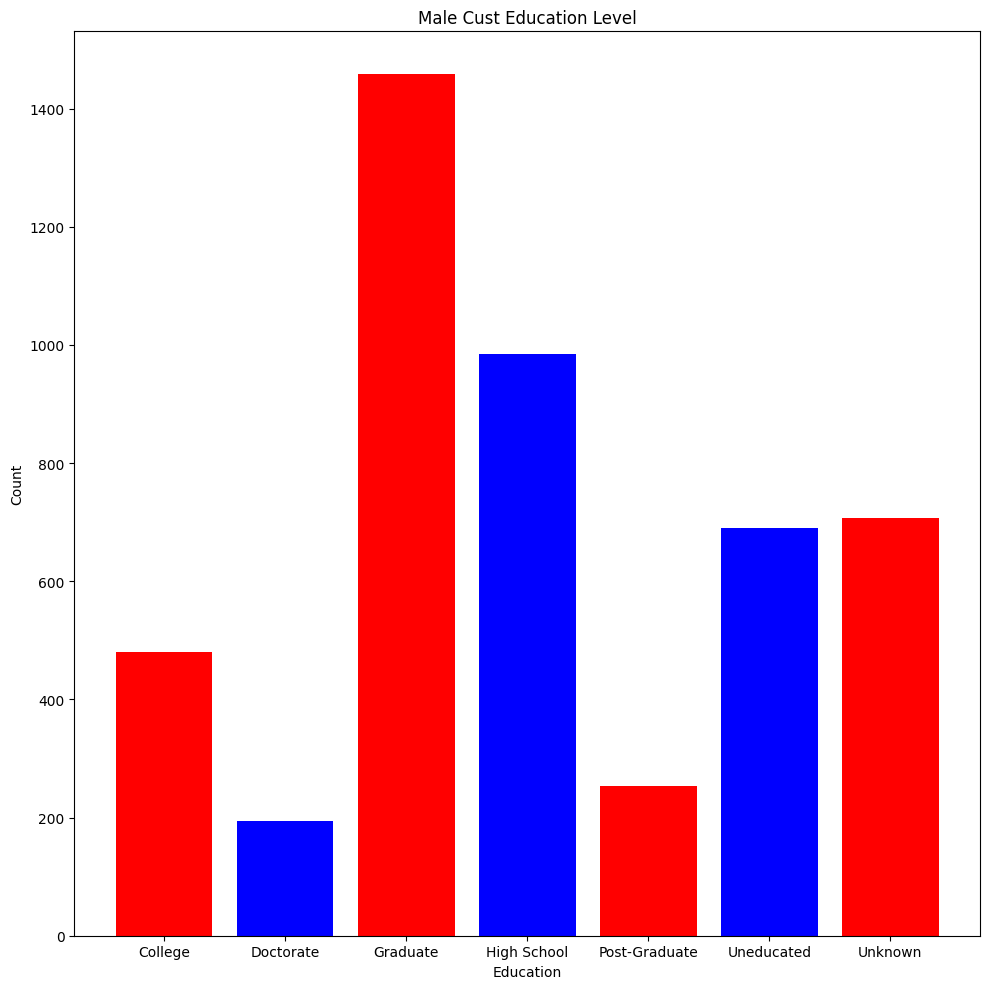

In [67]:
# Male Customer Education Level
plt.bar(edu_m['Education_Level'], edu_m['Gender'], color=['Red','Blue'])
plt.title('Male Cust Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.show()

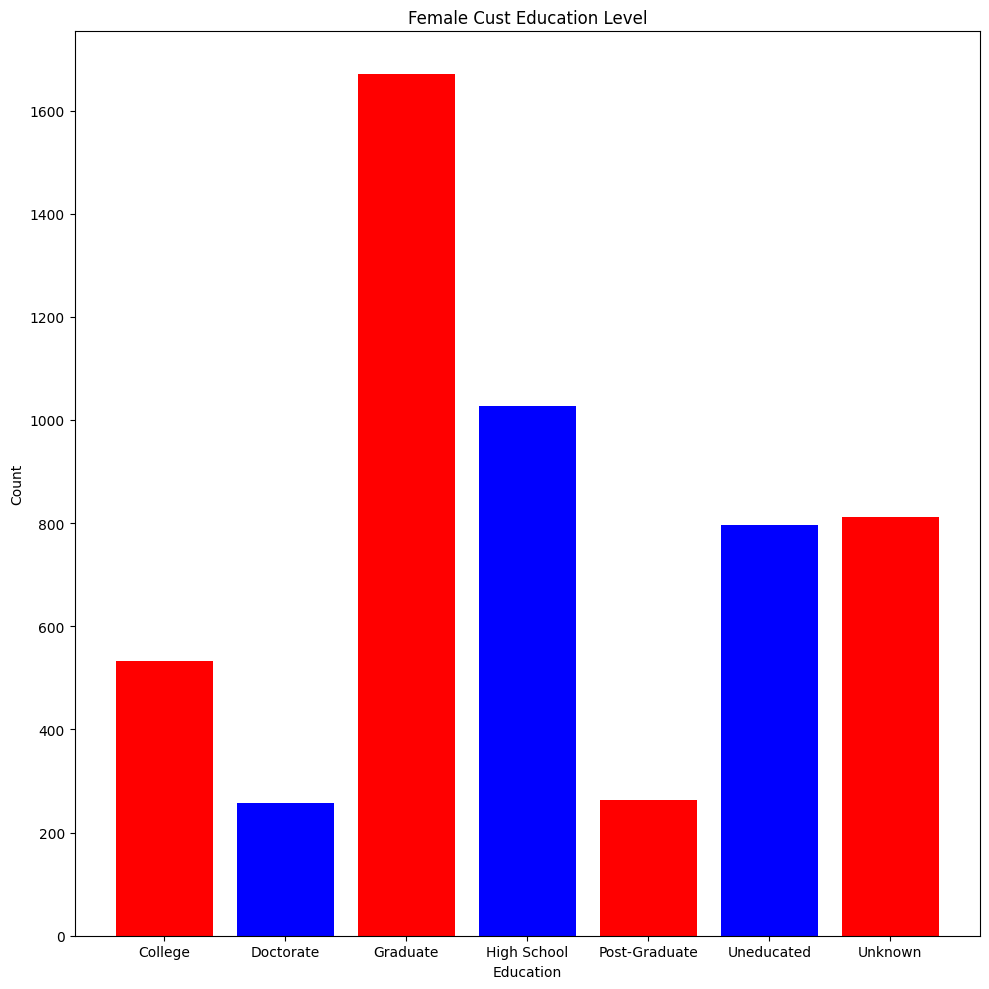

In [31]:
#Female Customer Education Level
plt.bar(edu_f['Education_Level'], edu_f['Gender'], color=['Red','Blue'])
plt.title('Female Cust Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.show()

### ---------------------------------------------------DIVIDER------------------------------------------------

## Income Distribution among Customers

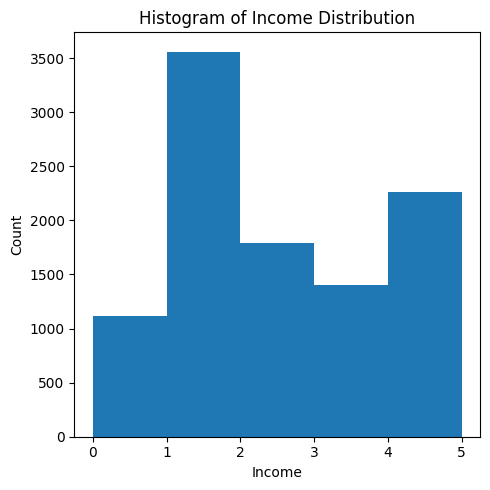

In [84]:
plt.hist(vis['income_index'], bins=5)
plt.title('Histogram of Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
plt.show()

In [36]:
#Income Dataframe
income = vis.groupby(['income', 'Gender']).size()
income = pd.DataFrame(income)
income

0
income  Gender      
High    M        727
Low     F       3284
        M        277
Mid     M       1402
Mid Low F       1014
        M        776
Mid Up  M       1535
unknown F       1060
        M         52

In [37]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  int64 
 1   Card_Category    10127 non-null  object
 2   Attrition_Flag   10127 non-null  object
 3   Customer_Age     10127 non-null  int64 
 4   Gender           10127 non-null  object
 5   Education_Level  10127 non-null  object
 6   Income_Category  10127 non-null  object
 7   income           10127 non-null  object
 8   income_index     10127 non-null  int32 
 9   age_cat          10127 non-null  object
dtypes: int32(1), int64(2), object(7)
memory usage: 751.7+ KB


### ---------------------------------------------------DIVIDER------------------------------------------------

# CREDIT VISUALISATION 2

Di bagian ini saya hanya menggabungkan datafram credit dan vis

In [38]:
columns= vis.columns.difference(credit.columns)

In [39]:
credit2 = pd.merge(credit, vis[columns], left_index=True, right_index=True, how='outer')
credit2.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,age_cat,income,income_index
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,adult,Mid,3
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,adult,Low,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,oldies,Mid Up,4
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,adult,Low,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,adult,Mid,3


In [40]:
credit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### ---------------------------------------------------DIVIDER------------------------------------------------

# Jumlah Customer per Kartu berdasarkan Income

Pada bagian ini saya ingin melihat apakah ada korelasi antara pendapatan customer dengan kartu kredit yang digunakan

In [93]:
vis2 = credit2[['CLIENTNUM','Card_Category','income','Months_Inactive_12_mon', 'Contacts_Count_12_mon','Total_Trans_Amt','Total_Trans_Ct']]
vis3 = credit2[['CLIENTNUM','Card_Category','Credit_Limit','Total_Trans_Amt','Total_Trans_Ct','income','income_index']]#credit score/limit

In [94]:
vis2.head()

,CLIENTNUM,Card_Category,income,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Blue,Mid,1,3,1144,42
1,818770008,Blue,Low,1,2,1291,33
2,713982108,Blue,Mid Up,1,0,1887,20
3,769911858,Blue,Low,4,1,1171,20
4,709106358,Blue,Mid,1,0,816,28


In [101]:
vis2['Card_Index'] = np.where(vis2['Card_Category'] == 'Silver',2,1)
vis2['Card_Index'] = np.where(vis2['Card_Category'] == 'Gold',3,vis2['Card_Index'])
vis2['Card_Index'] = np.where(vis2['Card_Category'] == 'Platinum',4,vis2['Card_Index'])


C:\Users\user\AppData\Local\Temp\ipykernel_9924\2185720385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis2['Card_Index'] = np.where(vis2['Card_Category'] == 'Silver',2,1)
C:\Users\user\AppData\Local\Temp\ipykernel_9924\2185720385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis2['Card_Index'] = np.where(vis2['Card_Category'] == 'Gold',3,vis2['Card_Index'])
C:\Users\user\AppData\Local\Temp\ipykernel_9924\2185720385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

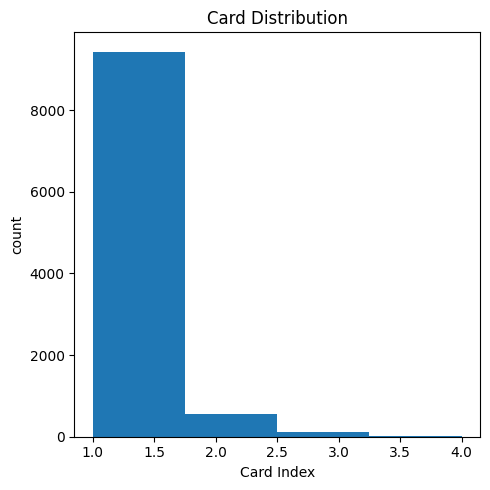

In [127]:
plt.hist(vis2['Card_Index'], bins=4)
plt.title('Card Distribution')
plt.xlabel('Card Index')
plt.ylabel('count')
plt.show()

In [79]:
vis2.groupby('Card_Category')[['CLIENTNUM']].count()

,CLIENTNUM
Card_Category,
Blue,9436
Gold,116
Platinum,20
Silver,555


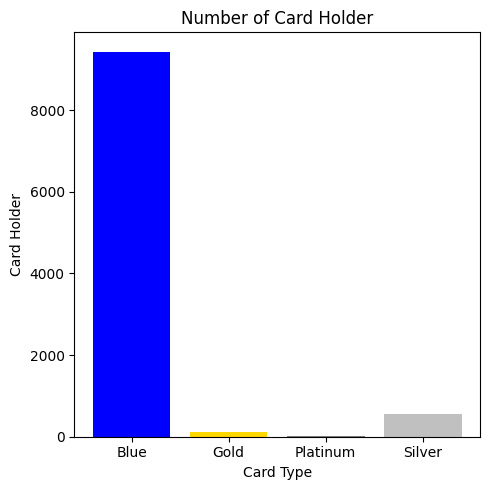

In [85]:
card_cat = vis2.groupby('Card_Category')[['CLIENTNUM']].count().reset_index()
plt.bar(card_cat['Card_Category'],card_cat['CLIENTNUM'],color=['Blue','Gold','Grey','Silver'])
plt.title('Number of Card Holder')
plt.xlabel('Card Type')
plt.ylabel('Card Holder')
plt.show()

([<matplotlib.patches.Wedge at 0x1c386991480>,
 [Text(-1.0748236255123569, 0.23399609834455073, 'Blue'),
  Text(1.0162511744449803, -0.4209911524476478, 'Gold'),
  Text(1.0331031377740856, -0.37775376466865185, 'Platinum'),
  Text(1.0837365179850522, -0.18845466188352708, 'Silver')],
 [Text(-0.5862674320976492, 0.12763423546066402, '93.2%'),
  Text(0.5543188224245346, -0.22963153769871694, '1.1%'),
  Text(0.5635108024222284, -0.2060475080010828, '0.2%'),
  Text(0.5911290098100285, -0.1027934519364693, '5.5%')])

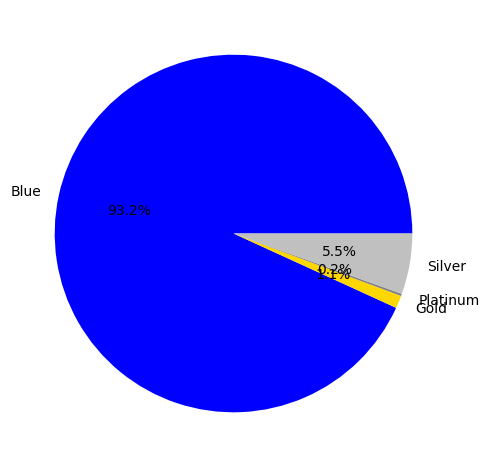

In [86]:
plt.pie(x=card_cat['CLIENTNUM'], labels=card_cat['Card_Category'],colors=['Blue','Gold','Grey','Silver'], autopct='%1.1f%%')

Secara distribusi, histogram yang dihasilkan menunjukan right skew distribution. Dari histogram tersebut pun dapat dilihat bahwa kebanyakan customer memegang Blue card dengan jumlah 9436 dari 10172 customer.Secara komposisi, jumlah ini adalah 93.3% dari total customer. Kartu blue dapat disimpulkan sebagai kartu yang paling populer, customer baru mungkin bisa ditawarkan untuk membuat kartu ini. Namun, apakah kartu yang dipengaruhi pada pendapatan? Mengetahui hal ini dapat memberikan insight tentang strategi memutuskan limit kartu, atau bahkan perks yang diberikan.

### ---------------------------------------------------DIVIDER------------------------------------------------

Untuk mendapatkan angka yang lebih akurat, saya membagi data vis2 ke dalam 4 kategori kartu

In [104]:
platinum = vis2.loc[vis2['Card_Category']=='Platinum']
silver = vis2.loc[vis2['Card_Category']=='Silver']
gold = vis2.loc[vis2['Card_Category']=='Gold']
blue = vis2.loc[vis2['Card_Category']=='Blue']

### Platinum Card Holder

In [108]:
pl = platinum.groupby('income')[['Card_Category']].count().reset_index()
pl = pl.drop(5)
pl

,income,Card_Category
0,High,4
1,Low,4
2,Mid,4
3,Mid Low,1
4,Mid Up,2


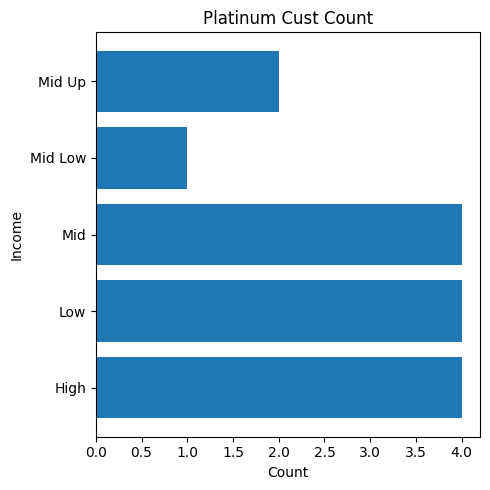

In [126]:
plt.barh(pl['income'], pl['Card_Category'])
plt.title('Platinum Cust Count')
plt.xlabel('Count')
plt.ylabel('Income')
plt.show()

### Gold Card Holder

In [109]:
gl = gold.groupby('income')[['Card_Category']].count().reset_index()
gl = gl.drop(5)
gl

,income,Card_Category
0,High,18
1,Low,24
2,Mid,29
3,Mid Low,15
4,Mid Up,21


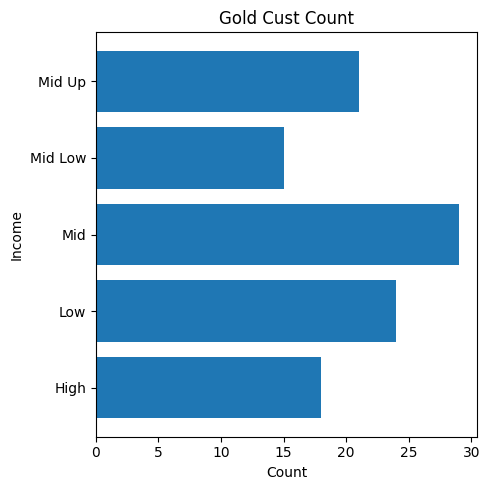

In [124]:
plt.barh(gl['income'], gl['Card_Category'])
plt.title('Gold Cust Count')
plt.xlabel('Count')
plt.ylabel('Income')
plt.show()

### SIlver Card Holder

In [111]:
sl = silver.groupby('income')[['Card_Category']].count().reset_index()
sl = sl.drop(5)
sl

,income,Card_Category
0,High,60
1,Low,130
2,Mid,96
3,Mid Low,99
4,Mid Up,117


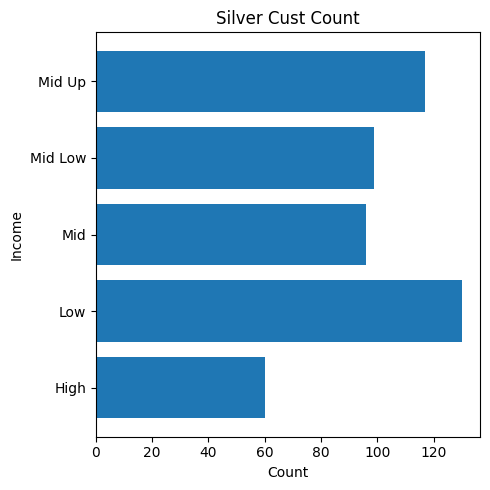

In [123]:
plt.barh(sl['income'], sl['Card_Category'])
plt.title('Silver Cust Count')
plt.xlabel('Count')
plt.ylabel('Income')
plt.show()

### Blue Card Holder

In [112]:
bl = blue.groupby('income')[['Card_Category']].count().reset_index()
bl = bl.drop(5)
bl

,income,Card_Category
0,High,645
1,Low,3403
2,Mid,1273
3,Mid Low,1675
4,Mid Up,1395


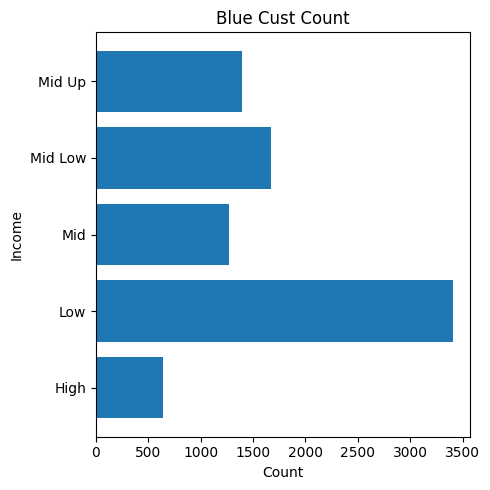

In [122]:
plt.barh(bl['income'], bl['Card_Category'])
plt.title('Blue Cust Count')
plt.xlabel('Count')
plt.ylabel('Income')
plt.show()

Secara kasat mata, status pendapatan terkesan tidak mempengaruhi kartu apa yang digunakan oleh customer. Kemungkinan, status kartu kredit ditentukan berdasarkan loyalitas atau seberapa sering kartu tersebut digunakan. Namun, angka customer masing-masing kartu terlalu timpang satu sama lain sehingga akan sulit menarik kesimpulan yang konkrit tanpa informasi-informasi tambahan.

### ---------------------------------------------------DIVIDER------------------------------------------------

# Keaktifan Customer

Bagian ini melihat rata-rata durasi customer tidak menggunakan kartu kredit

In [45]:
inactive_user = vis2.groupby('Card_Category')[['Months_Inactive_12_mon']].mean().reset_index()
inactive_user

,Card_Category,Months_Inactive_12_mon
0,Blue,2.345697
1,Gold,2.310345
2,Platinum,2.250000
3,Silver,2.273874


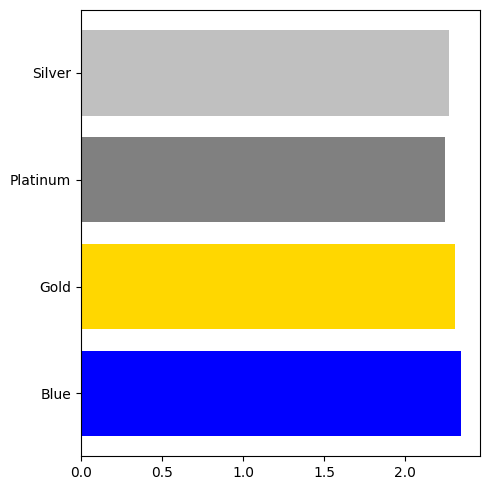

In [46]:
plt.barh(inactive_user['Card_Category'], inactive_user['Months_Inactive_12_mon'], color=['Blue','Gold','Grey','Silver'])
plt.show()

Rata-rata customer tidak menggunakan kartunya selama 2 bulan, baik itu pengguna kartu Blue, Silver, Gold, atau Platinum. Menunjukkan bahwa customer relatif aktif dalam menggunakan kartu kredit.

### ---------------------------------------------------DIVIDER------------------------------------------------

# Apakah Income Mempengaruhi Transaksi?

Bagian ini akan melihat apakah pendapatan seseorang akan mempengaruhi transaksi yang dilakukan, baik banyaknya transaksi (count) ataupun besar value transaksi (amount).

In [49]:
vis3.head()

,CLIENTNUM,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,income,income_index
0,768805383,Blue,12691.0,1144,42,Mid,3
1,818770008,Blue,8256.0,1291,33,Low,1
2,713982108,Blue,3418.0,1887,20,Mid Up,4
3,769911858,Blue,3313.0,1171,20,Low,1
4,709106358,Blue,4716.0,816,28,Mid,3


In [50]:
trans = vis3.groupby('income')[['Total_Trans_Amt','Total_Trans_Ct','income_index']].mean().sort_values(by='income_index', ascending=False).reset_index()
trans = trans.drop(5)
trans

,income,Total_Trans_Amt,Total_Trans_Ct,income_index
0,High,4529.467675,63.704264,5.0
1,Mid Up,4482.960261,62.696417,4.0
2,Mid,4450.712553,63.247504,3.0
3,Mid Low,4405.618994,65.000559,2.0
4,Low,4363.420107,66.154732,1.0


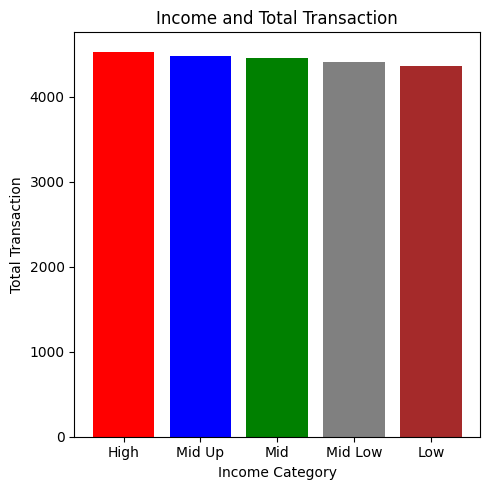

In [51]:
plt.bar(trans['income'], trans['Total_Trans_Amt'], color=['Red','Blue','Green','Grey','Brown'])
plt.title('Income and Total Transaction')
plt.xlabel('Income Category')
plt.ylabel('Total Transaction')
plt.show()

Pada bar chart di atas, terlihat jika masing-masing kelompok income cenderung serupa dalam jumlah pengeluarannya (trans amount). Secara logic, ini tidak mungkin karena income mempengaruhi daya beli seseorang. Oleh karena itu, saya gunakan scatter plot untuk lebih jelas melihatnya.

### ---------------------------------------------------DIVIDER------------------------------------------------

### Average Transaction Count based on Income

In [130]:
trans_cnt = vis3.groupby('income')[['Total_Trans_Amt','Total_Trans_Ct','income_index']].mean().sort_values(by='income_index',ascending=False).reset_index()
trans_cnt = trans_cnt.drop(5)
trans_cnt

,income,Total_Trans_Amt,Total_Trans_Ct,income_index
0,High,4529.467675,63.704264,5.0
1,Mid Up,4482.960261,62.696417,4.0
2,Mid,4450.712553,63.247504,3.0
3,Mid Low,4405.618994,65.000559,2.0
4,Low,4363.420107,66.154732,1.0


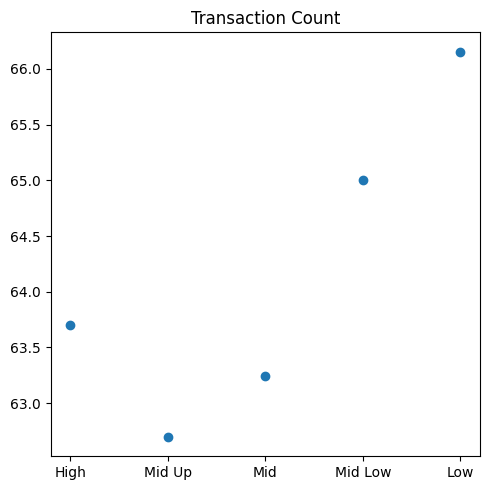

In [131]:
plt.scatter(trans_cnt['income'], trans_cnt['Total_Trans_Ct'])
plt.title ('Transaction Count')
plt.show()

Scatter plot diatas menunjukkan rata-rata jumlah transaksi (trans count) yang dilakukan berdasarkan kelompok income. Dapat dilihat bahwa titik yang ada tidak menunjukkan garis lurus. Artinya, berapa kali seseorang menggunakan kartu kreditnya tidak dipengaruhi oleh pendapatan mereka.

### Average Transaction Amount based on Income

In [54]:
trans_mean = vis3.groupby('income')[['Total_Trans_Amt','Total_Trans_Ct','income_index']].mean().sort_values(by='income_index',ascending=True).reset_index()
trans_mean = trans_mean.drop(0)
trans_mean

,income,Total_Trans_Amt,Total_Trans_Ct,income_index
1,Low,4363.420107,66.154732,1.0
2,Mid Low,4405.618994,65.000559,2.0
3,Mid,4450.712553,63.247504,3.0
4,Mid Up,4482.960261,62.696417,4.0
5,High,4529.467675,63.704264,5.0


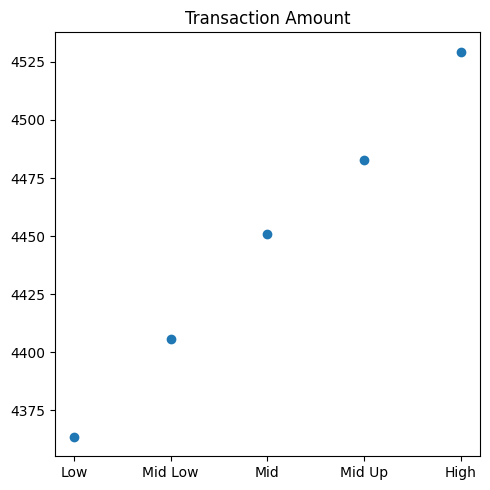

In [132]:
plt.scatter(trans_mean['income'],trans_mean['Total_Trans_Amt'])
plt.title('Transaction Amount')
plt.show()

Scatter plot di atas ini menunjukkan rerata value dari transaksi yang dilakukan (trans amount). Artinya, seberapa besar yang dikeluarkan oleh masing-masing kelompok menggunakan kartu kredit mereka. Pada plot di atas, terlihat jika titik terbentuk secara lurus, menunjukkan bahwa semakin tinggi pendapatan seseorang, maka semakin besar lah value transaksinya. Ini mendukung pemahaman tentang hubungan antara pendapatan dengan daya beli,bahwasanya semakin besar pendapatan, maka semakin tinggi pula daya beli seseorang.